In [ ]:
import pandas as pd

file_path=r"C:\Users\Admin\Downloads\superstore.xlsx"
data=pd.read_excel(file_path)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
print(f"Dataset Shape:{data.shape}")
data.info
data.describe


Dataset Shape:(599, 21)


<bound method NDFrame.describe of      Row ID        Order ID Order Date   Ship Date       Ship Mode  \
0         1  US-2021-103800      44256       44378  Standard Class   
1         2  US-2021-112326      44287       44409  Standard Class   
2         3  US-2021-112326      44287       44409  Standard Class   
3         4  US-2021-112326      44287       44409  Standard Class   
4         5  US-2021-141817      44317       44531  Standard Class   
..      ...             ...        ...         ...             ...   
594     595  US-2021-141257      44414  14-06-2021  Standard Class   
595     596  US-2021-108147      44414  13-06-2021  Standard Class   
596     597  US-2021-108147      44414  13-06-2021  Standard Class   
597     598  US-2021-115812      44445  14-06-2021  Standard Class   
598     599  US-2021-160262      44445  13-06-2021    Second Class   

    Customer ID    Customer Name      Segment Country/Region             City  \
0      DP-13000    Darren Powers     Consume

In [ ]:
print("missing",data.isnull().sum())
data.fillna(data.median(numeric_only=True),inplace=True)

missing Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


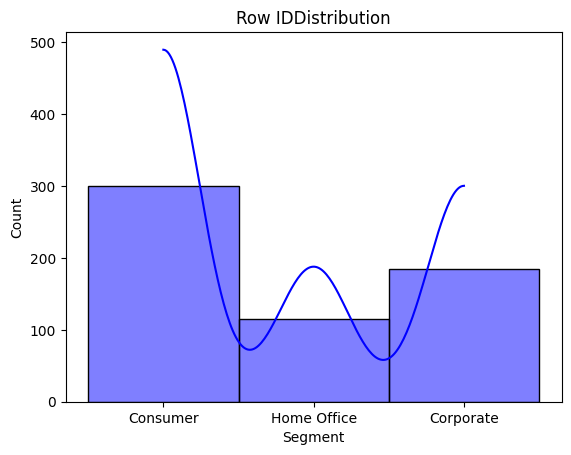

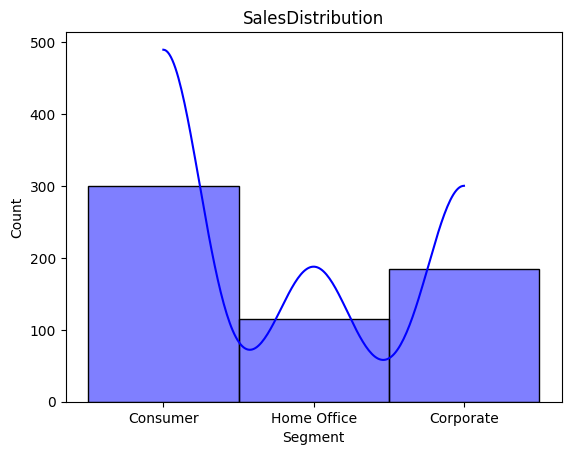

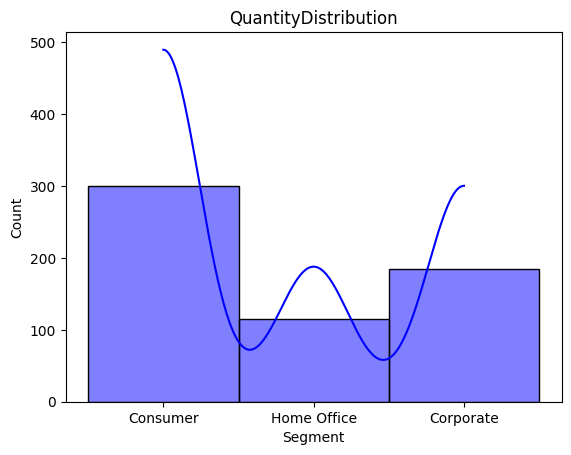

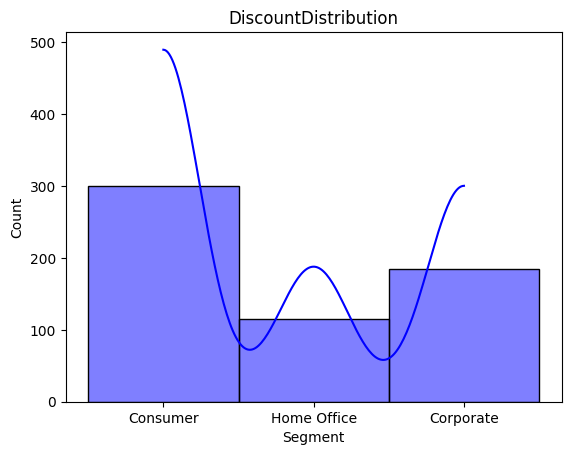

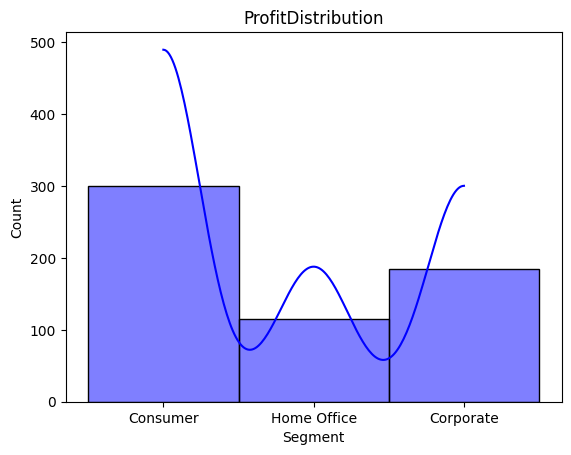

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in data.select_dtypes(include ='number'):
    sns.histplot(data['Segment'],kde=True,color='blue')
    plt.title(f'{column}Distribution')
    plt.show()

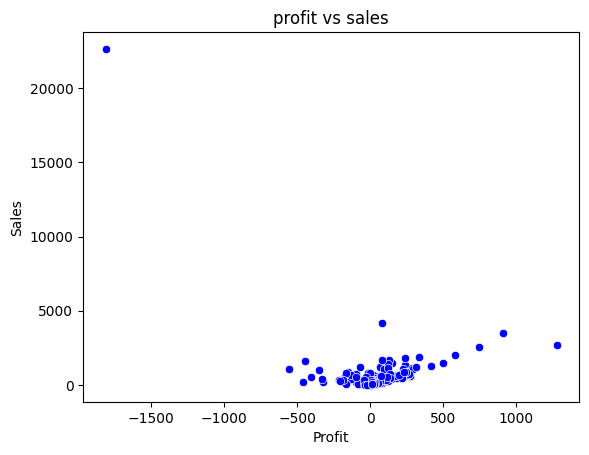

In [ ]:
sns.scatterplot(x='Profit',y='Sales',data=data,color='blue')
plt.title('profit vs sales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

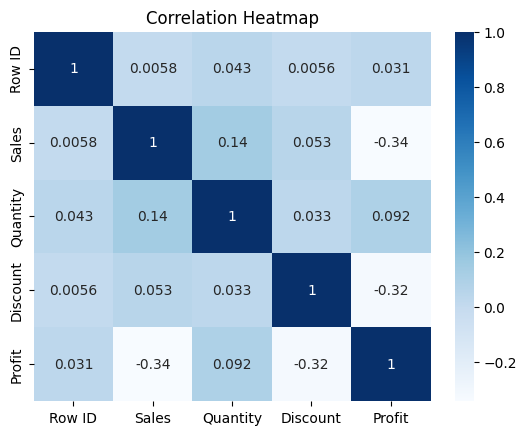

In [ ]:
correlation = data.select_dtypes(include='number').corr()

sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show

In [ ]:
Check the Dependent and Independent Variables:

# Displaying the columns in the dataset
print("Columns in the dataset:")
print(data.columns)

dependent_variable = 'Sales'  # Change this based on your analysis
independent_variables = data.columns[data.columns != dependent_variable].tolist()

# Displaying the dependent and independent variables
print("\nDependent Variable:")
print(dependent_variable)

print("\nIndependent Variables:")
print(independent_variables)

#Interpretations
The code identifies and displays the dependent variable (Sales) and the independent variables (all other columns) in the dataset, setting the stage for
further analysis. This step is crucial for understanding which factors will be used to predict sales outcomes in subsequent modeling efforts.

Columns in the dataset:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Dependent Variable:
Sales

Independent Variables:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']


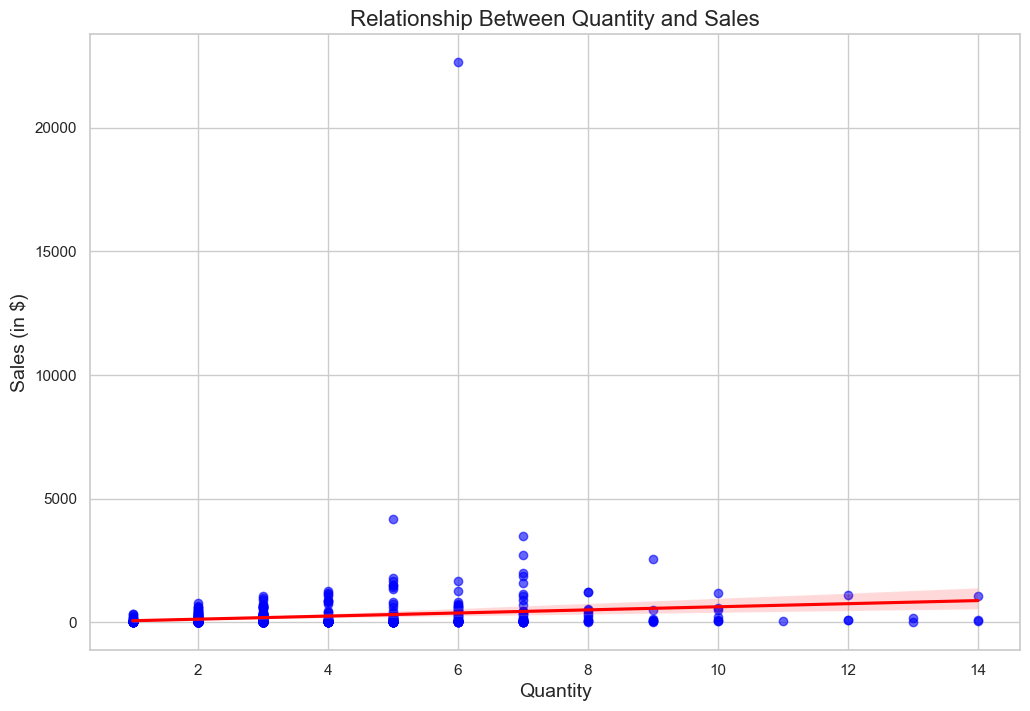

In [ ]:
Divide the data into independent and dependent variables:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.regplot(x='Quantity', y='Sales', data=data, scatter_kws={'alpha': 0.6, 'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship Between Quantity and Sales', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Sales (in $)', fontsize=14)

plt.show()

#Interpretations
The enhanced scatter plot visualizes the relationship between Quantity and Sales, with a fitted regression line indicating the trend in the data.
The semi-transparent points allow for better visibility of data density, while the red regression line helps to illustrate the overall correlation
between the two variables.

In [ ]:
Split the data into train and test sets:

import pandas as pd
from sklearn.model_selection import train_test_split

dependent_variable = 'Sales'
independent_variables = data.drop(columns=[dependent_variable])

X_train, X_test, y_train, y_test = train_test_split(independent_variables, data[dependent_variable], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#Interpretation
The code splits the Superstore dataset into training and testing sets, with 80% of the data allocated for training the model and 20% reserved
for testing its performance. This separation allows for effective evaluation of the model's predictive capabilities on unseen data, ensuring
that the results are reliable and generalizable.

Shape of X_train: (479, 20)
Shape of X_test: (120, 20)
Shape of y_train: (479,)
Shape of y_test: (120,)


In [ ]:
Shape of the train and test sets:

import pandas as pd
from sklearn.model_selection import train_test_split

file_path = r"C:\Users\Admin\Downloads\superstore.xlsx"
data = pd.read_excel(file_path)

dependent_variable = 'Sales'
independent_variables = data.drop(columns=[dependent_variable])

X_train, X_test, y_train, y_test = train_test_split(independent_variables, data[dependent_variable], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

#Interpretation
The code splits the Superstore dataset into training and testing sets, with 80% of the data allocated for training the model and 20% reserved
for testing its performance. This separation allows for effective evaluation of the model's predictive capabilities on unseen data, ensuring
that the results are reliable and generalizable.

Shape of X_train: (479, 20)
Shape of X_test: (120, 20)
Shape of y_train: (479,)
Shape of y_test: (120,)


In [ ]:
Convert Categorical Variables to Numeric:

from sklearn.preprocessing import OneHotEncoder

data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
# Define independent variables
independent_variables = data_encoded.drop(columns=[dependent_variable])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent_variables, data_encoded[dependent_variable], test_size=0.2, random_state=42)

In [ ]:
Train the Algorithm:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#Interpretations
 A linear regression model is instantiated and trained using the training dataset (X_train and y_train). The model learns the relationship between
the independent variables and the dependent variable (Sales).

LinearRegression()

In [ ]:
# Retrieve the intercept and slope
intercept = model.intercept_
slope = model.coef_

#Interpretation:
The intercept and slope coefficients of the trained model are retrieved. The intercept represents the expected value of Sales
when all independent variables are zero, while the slope coefficients indicate the change in Sales for a one-unit change in each independent variable.

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

#Interpretation:
Predictions are made on the test set using the trained model. The predicted values (y_pred) represent the model's
estimates of Sales based on the independent variables in the test dataset.


In [ ]:
Evaluate the Algorithm

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Interpretation:
The model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics.
MSE quantifies the average squared difference between predicted and actual values, while R² indicates
the proportion of variance in Sales that is predictable from the independent variables.

In [ ]:
# Display results
print("Intercept:", intercept)
print("Slope:", slope)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#Interpretation:
The results of the model, including the intercept, slope coefficients, Mean Squared Error, and R-squared value, are printed to the console.
These metrics provide insight into the model's predictive capabilities and overall performance

Intercept: -209.28196188982966
Slope: [ 9.10382880e-14  1.19151823e+02 -6.59974728e+02 ... -1.35657481e+01
 -4.15247833e+02  0.00000000e+00]
Mean Squared Error: 1126861.1372543008
R-squared: -4.251363630342421


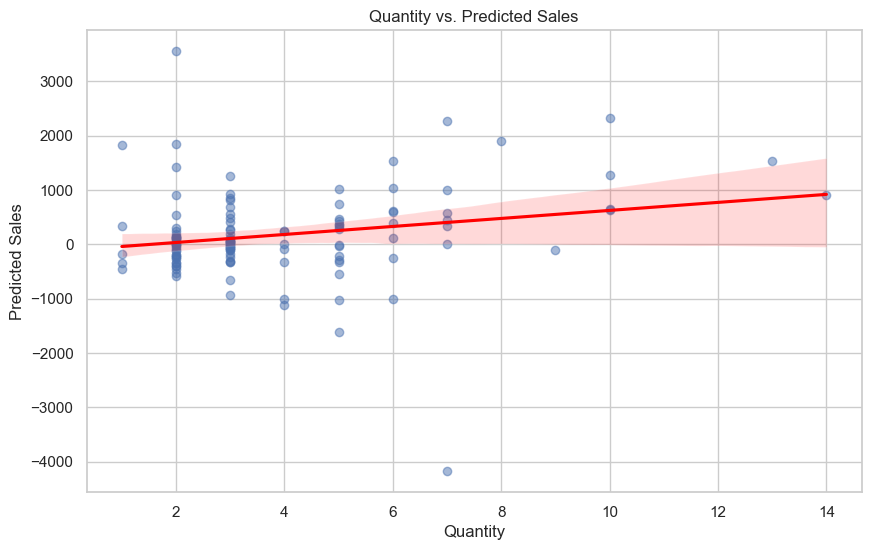

In [ ]:
#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Quantity' is one of the independent variables
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['Quantity'], y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Quantity vs. Predicted Sales')
plt.xlabel('Quantity')
plt.ylabel('Predicted Sales')
plt.show()

#Interpretation:
This scatter plot visualizes the relationship between Quantity and the predicted Sales. The red line represents the fitted regression line, indicating
the trend in the data.

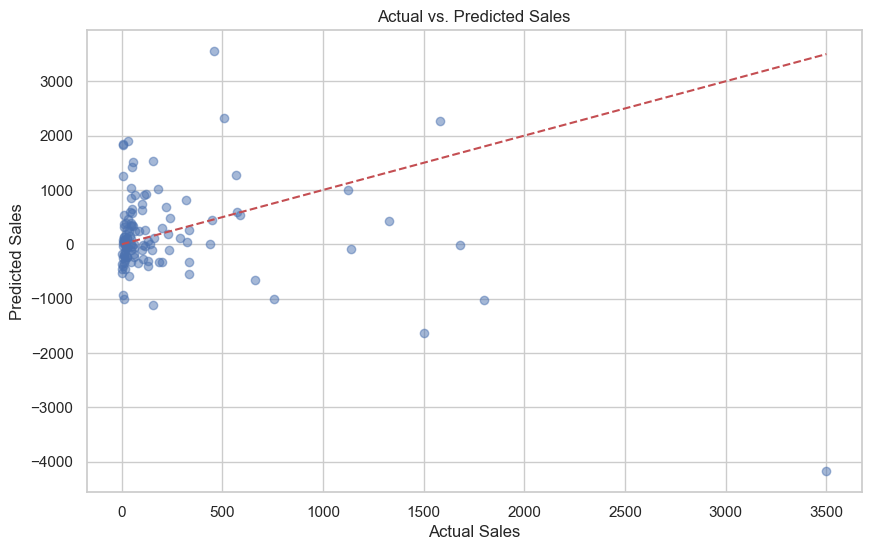

In [ ]:
#Actual vs. Predicted Values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()